In [1]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)
wine.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [3]:
# Checking for Nan Values
wine.isna().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [4]:
# Checking for duplicated data
wine.duplicated().sum()

np.int64(1168)

In [5]:
# We need to remove duplicated rows and missing value rows
import pandas as pd

# Load the Wine Quality dataset
wine_data = pd.read_csv(wine_data_path)
print("Wine Data Shape :", wine_data.shape)
# Drop rows with missing values
wine_data = wine_data.dropna()

# Dropping Duplicates rows
wine_data.drop_duplicates(inplace=True)
print("Wine Data Shape (After Dropping-) :", wine_data.shape)

Wine Data Shape : (6497, 13)
Wine Data Shape (After Dropping-) : (5295, 13)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = wine_data.drop('type', axis=1)
y = wine_data['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# as we want to mean center the data, only standardization can help us with that.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# WITHOUT PCA, TRAINING WITH KNN, so with have 12 features in the X_train and X_test currently.
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train_scaled, y_train)


y_pred_no_pca = knn_no_pca.predict(X_test_scaled)

accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("KNN having features -", X_train_scaled.shape[1])
print("Classification Accuracy without PCA: {:.2f}%".format(accuracy_no_pca * 100))


KNN having features - 12
Classification Accuracy without PCA: 99.34%


In [7]:
# TRAINING WITH PCA.
pca = PCA(n_components=5) #select number of principal components (reduced number of dimensions that you want to have)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_with_pca = KNeighborsClassifier(n_neighbors=5)
knn_with_pca.fit(X_train_pca, y_train)

y_pred_pca = knn_with_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("KNN having features -", X_train_pca.shape[1])
print("Classification Accuracy with PCA: {:.2f}%".format(accuracy_pca * 100))

KNN having features - 5
Classification Accuracy with PCA: 98.87%


In [8]:
'''
this gives you the 5 eigen values of the 5 principal components. the eigen values are in descending order, suggesting that the first eigen value is of the
principal component 1 (PC1) which is the highest, depicting highest variance. Then comes the rest principal components.
'''
pca.explained_variance_ratio_

array([0.25338398, 0.22064311, 0.13758045, 0.08945723, 0.07060832])

In [9]:
'''
Finding optimal number of principal components.
'''
pca1 = PCA(n_components=None)
X_train_pca = pca1.fit_transform(X_train_scaled)
X_test_pca = pca1.transform(X_test_scaled)

In [10]:
pca1.explained_variance_ratio_

array([0.25338398, 0.22064311, 0.13758045, 0.08945723, 0.07060832,
       0.05464252, 0.0451817 , 0.04242425, 0.03938657, 0.02514279,
       0.01862054, 0.00292855])

In [11]:
import numpy as np
'''
we are doing cumulative sum because we need the total summation to be 0.9 or above.
why 0.9?
0.9 means that the eigen values are representing 90% of the variance of the original data.
for eg:- PC1 represents 25.3% of variance. that is NOT enough and sirf PC1 se kaam nahi chalega. we need more variance in the reduced dimension data.
hence, we gather more principal components.
'''
np.cumsum(pca1.explained_variance_ratio_)

array([0.25338398, 0.47402709, 0.61160755, 0.70106477, 0.77167309,
       0.82631561, 0.87149731, 0.91392156, 0.95330812, 0.97845091,
       0.99707145, 1.        ])

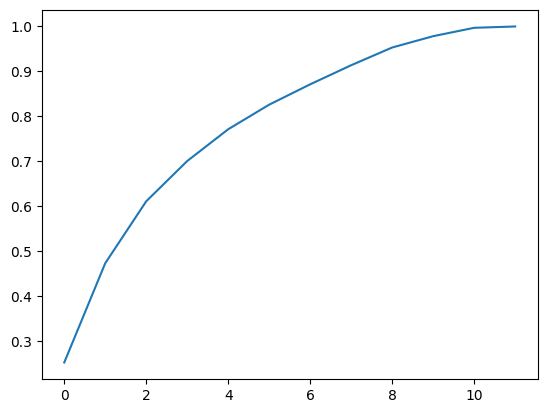

In [12]:
import matplotlib.pyplot as plt
'''
x axis = number of principal components taken
y axis = corresponding cumulative variance the taken principal components give
this graph suggests that if you extrapolate the line from 0.9 of y axis along the x axis, where it meets the graph, the corresponding value of x axis (which
depicts number of principal components) will be the optimal number of principal components to consider. isse less number of principal components can be used
but usme accuracy thodi kam ayegi.

here, optimum number of principal components is 7.
'''

plt.plot(np.cumsum(pca1.explained_variance_ratio_))

In [13]:
'''
by using 7 PC, you can see accuracy is better than when using 5 PC.
'''
pca1 = PCA(n_components=7)
X_train_pca = pca1.fit_transform(X_train_scaled)
X_test_pca = pca1.transform(X_test_scaled)

knn_with_pca = KNeighborsClassifier(n_neighbors=5)
knn_with_pca.fit(X_train_pca, y_train)

# Predict the wine type on the testing set with PCA
y_pred_pca = knn_with_pca.predict(X_test_pca)

# Evaluate the classification accuracy with PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("KNN having features -", X_train_pca.shape[1])
print("Classification Accuracy with PCA: {:.2f}%".format(accuracy_pca * 100))

KNN having features - 7
Classification Accuracy with PCA: 99.06%
